In [1]:
import numpy as np
import metpy.calc as mpcalc
from metpy.units import units
from metpy.plots import Hodograph, SkewT
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from metpy.calc import wind_components


In [2]:
#Project Soundings


In [3]:
#Sounding 1 (KOAK Dec 26 12z)

#open file
sounding_file = open("KOAKDec26.txt","r").readlines()

#append works best here, even though appending is bad
#station,validUTC,levelcode,pressure_mb,height_m,tmpc,dwpc,drct,speed_kts,bearing,range_sm

#creating emptly lists
station = []
validUTC =[]
levelcode = []
pressure_mb = []
height_m = []
tmpc = []
dwpc = []
drct = []
speed_kts = []
bearing = []
range_sm = []

#loop through each line in sounding, skipping first line which is the header
for line in sounding_file[1:]:
    #appending to each list the variable 
    #station is the zero-th column when split by commas 
    station.append(line.split(",")[0])
    validUTC.append(line.split(",")[1])
    levelcode.append(line.split(",")[2])
    pressure_mb.append(line.split(",")[3])
    height_m.append(line.split(",")[4])
    tmpc.append(line.split(",")[5])
    dwpc.append(line.split(",")[6])
    drct.append(line.split(",")[7])
    speed_kts.append(line.split(",")[8])
    bearing.append(line.split(",")[9])
    range_sm.append(line.split(",")[10].strip())
    #added .strip to get rid of new line ("n/") character at end of range_sm

#creating empty list to hold values from mandatory and significant station levels 
station_subset = []
validUTC_subset = []
levelcode_subset = []
pressure_mb_subset = []
height_m_subset = []
tmpc_subset = []
dwpc_subset = []
drct_subset = []
speed_kts_subset = []
bearing_subset = []
range_sm_subset = []

#looping through each level in sounding to check if it is a mandatory or significant level
#we are doing this by looping through the indicies
for i in range(len(levelcode)):
    #if level code is mandatory or significant 
    if levelcode[i] == '4' or levelcode[i] == '5':
        #add variable at each level to list
        station_subset.append(station[i])
        validUTC_subset.append(validUTC[i])
        levelcode_subset.append(levelcode[i])
        pressure_mb_subset.append(pressure_mb[i])
        height_m_subset.append(height_m[i])
        tmpc_subset.append(tmpc[i])
        dwpc_subset.append(dwpc[i])
        drct_subset.append(drct[i])
        speed_kts_subset.append(speed_kts[i])
        bearing_subset.append(bearing[i])
        range_sm_subset.append(range_sm[i])
        
#loop through each level in subset of 4s and 5s
for i in range(len(levelcode_subset)):
    #changing the items to either a integer or a floating point number
    #leave station and valid UTC as strings
    levelcode_subset[i] = int(levelcode_subset[i])
    
    if pressure_mb_subset[i] == 'M':
        pressure_mb_subset[i] = float('NaN')
    else:
        pressure_mb_subset[i] = float(pressure_mb_subset[i])
    if height_m_subset[i] == 'M':
        height_m_subset[i] = float('NaN')
    else:
        height_m_subset[i] = float(height_m_subset[i])
    if tmpc_subset[i] == 'M':
        tmpc_subset[i] = float('NaN')
    else:
        tmpc_subset[i] = float(tmpc_subset[i]) 
    if dwpc_subset[i] == 'M':
        dwpc_subset[i] = float('NaN')
    else:
        dwpc_subset[i] = float(dwpc_subset[i])
    if drct_subset[i] == 'M':
        drct_subset[i] = float('NaN')
    else:
        drct_subset[i] = float(drct_subset[i])
    if speed_kts_subset[i] == 'M':
        speed_kts_subset[i] = float('NaN')
    else:
        speed_kts_subset[i] = float(speed_kts_subset[i])
    if bearing_subset[i] == 'M':
        bearing_subset[i] = float('NaN')
    else:
        bearing_subset[i] = float(height_m_subset[i])
    if range_sm_subset[i] == 'M':
        range_sm_subset[i] = float('NaN')
    else:
        range_sm_subset[i] = float(height_m_subset[i])

#adding units to each list
pressure_mb_subset = pressure_mb_subset*units('millibar')
height_m_subset = height_m_subset*units('meters')
tmpc_subset = tmpc_subset*units('degC')
dwpc_subset = dwpc_subset*units('degC')
drct_subset = drct_subset*units('degrees')
speed_kts_subset = speed_kts_subset*units('knots')
bearing_subset = bearing_subset*units('degrees')
range_sm_subset = range_sm_subset*units('miles')

#using MetPy to gey U and V components of wind
u, v = wind_components(speed_kts_subset, drct_subset)

#open file
with open('KOAKDec26.csv', 'w') as outfile:
    #write to file
    outfile.write(f"{station[0]} - {validUTC[0]}\n")
    outfile.write(f"pressure[mb],height[m],temperature[degC],dewpoint[degC],u-wind[kts],v-wind[kts]\n")
    for i in range(len(pressure_mb_subset)):
        outfile.write(f"{pressure_mb_subset[i].magnitude},")
        outfile.write(f"{height_m_subset[i].magnitude},")
        outfile.write(f"{tmpc_subset[i].magnitude},")
        outfile.write(f"{dwpc_subset[i].magnitude},")
        #writing u and v components to two decimal places
        outfile.write(f"{u[i].magnitude:0.2f},")
        outfile.write(f"{v[i].magnitude:0.2f}\n")

#close file
outfile.close()


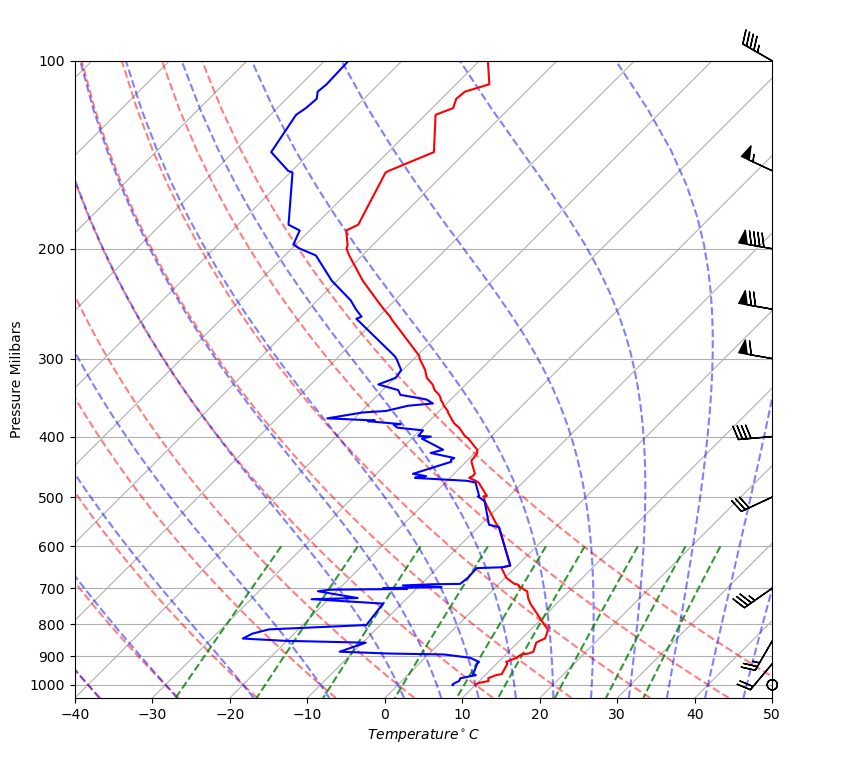

In [16]:
#opening the file and reading it into lists
data = pd.read_csv("KOAKDec26.csv", delimiter=',',skiprows=1)

#grab each variable and add units
pressure = np.array(data['pressure[mb]'])*units('millibars')
height = np.array(data['height[m]'])*units('meters')
tmp = np.array(data['temperature[degC]'])*units('degC')
dwp = np.array(data['dewpoint[degC]'])*units('degC')
u = np.array(data['u-wind[kts]'])*units('kts')
v = np.array(data['v-wind[kts]'])*units('kts')

#create a figure and give it a figsize of 9x9, with a dpi of 100
fig = plt.figure(figsize = (9,9), dpi = 100)

#create Skew-T
skew = SkewT(fig,rotation=45)

skew.plot_dry_adiabats()
skew.plot_moist_adiabats()
skew.plot_mixing_lines()

#add a x axis labels with units
plt.xlabel("$Temperature {^\circ}C$")

#add a y label with units 
plt.ylabel("Pressure Milibars")

#add temperature in red
skew.plot(pressure[121:], tmp[121:], color = 'red')

#add dewpoint in blue
skew.plot(pressure[121:], dwp[121:], color = 'blue')

#plot wind barbs
skew.plot_barbs(pressure[121:], u[121:], v[121:])

#set x-axis limits that look good (use your eyes)
#skew.ax.set_xlim(-40,30)

#set y-axis limits that include the tropopause but not a ton of the stratosphere
#skew.ax.set_ylim(1000, 150)

#to make sure everything looks okay
#fig.tight_layout()

#save the skew T as skewT.png
#plt.savefig('skewTKOAKDec26.png')

In [17]:
#Sounding 2 (KOAK Dec 27 12z)

#open file
sounding_file = open("KOAKDec27.txt","r").readlines()

#append works best here, even though appending is bad
#station,validUTC,levelcode,pressure_mb,height_m,tmpc,dwpc,drct,speed_kts,bearing,range_sm

#creating emptly lists
station = []
validUTC =[]
levelcode = []
pressure_mb = []
height_m = []
tmpc = []
dwpc = []
drct = []
speed_kts = []
bearing = []
range_sm = []

#loop through each line in sounding, skipping first line which is the header
for line in sounding_file[1:]:
    #appending to each list the variable 
    #station is the zero-th column when split by commas 
    station.append(line.split(",")[0])
    validUTC.append(line.split(",")[1])
    levelcode.append(line.split(",")[2])
    pressure_mb.append(line.split(",")[3])
    height_m.append(line.split(",")[4])
    tmpc.append(line.split(",")[5])
    dwpc.append(line.split(",")[6])
    drct.append(line.split(",")[7])
    speed_kts.append(line.split(",")[8])
    bearing.append(line.split(",")[9])
    range_sm.append(line.split(",")[10].strip())
    #added .strip to get rid of new line ("n/") character at end of range_sm

#creating empty list to hold values from mandatory and significant station levels 
station_subset = []
validUTC_subset = []
levelcode_subset = []
pressure_mb_subset = []
height_m_subset = []
tmpc_subset = []
dwpc_subset = []
drct_subset = []
speed_kts_subset = []
bearing_subset = []
range_sm_subset = []

#looping through each level in sounding to check if it is a mandatory or significant level
#we are doing this by looping through the indicies
for i in range(len(levelcode)):
    #if level code is mandatory or significant 
    if levelcode[i] == '4' or levelcode[i] == '5':
        #add variable at each level to list
        station_subset.append(station[i])
        validUTC_subset.append(validUTC[i])
        levelcode_subset.append(levelcode[i])
        pressure_mb_subset.append(pressure_mb[i])
        height_m_subset.append(height_m[i])
        tmpc_subset.append(tmpc[i])
        dwpc_subset.append(dwpc[i])
        drct_subset.append(drct[i])
        speed_kts_subset.append(speed_kts[i])
        bearing_subset.append(bearing[i])
        range_sm_subset.append(range_sm[i])
        
#loop through each level in subset of 4s and 5s
for i in range(len(levelcode_subset)):
    #changing the items to either a integer or a floating point number
    #leave station and valid UTC as strings
    levelcode_subset[i] = int(levelcode_subset[i])
    
    if pressure_mb_subset[i] == 'M':
        pressure_mb_subset[i] = float('NaN')
    else:
        pressure_mb_subset[i] = float(pressure_mb_subset[i])
    if height_m_subset[i] == 'M':
        height_m_subset[i] = float('NaN')
    else:
        height_m_subset[i] = float(height_m_subset[i])
    if tmpc_subset[i] == 'M':
        tmpc_subset[i] = float('NaN')
    else:
        tmpc_subset[i] = float(tmpc_subset[i]) 
    if dwpc_subset[i] == 'M':
        dwpc_subset[i] = float('NaN')
    else:
        dwpc_subset[i] = float(dwpc_subset[i])
    if drct_subset[i] == 'M':
        drct_subset[i] = float('NaN')
    else:
        drct_subset[i] = float(drct_subset[i])
    if speed_kts_subset[i] == 'M':
        speed_kts_subset[i] = float('NaN')
    else:
        speed_kts_subset[i] = float(speed_kts_subset[i])
    if bearing_subset[i] == 'M':
        bearing_subset[i] = float('NaN')
    else:
        bearing_subset[i] = float(height_m_subset[i])
    if range_sm_subset[i] == 'M':
        range_sm_subset[i] = float('NaN')
    else:
        range_sm_subset[i] = float(height_m_subset[i])

#adding units to each list
pressure_mb_subset = pressure_mb_subset*units('millibar')
height_m_subset = height_m_subset*units('meters')
tmpc_subset = tmpc_subset*units('degC')
dwpc_subset = dwpc_subset*units('degC')
drct_subset = drct_subset*units('degrees')
speed_kts_subset = speed_kts_subset*units('knots')
bearing_subset = bearing_subset*units('degrees')
range_sm_subset = range_sm_subset*units('miles')

#using MetPy to gey U and V components of wind
u, v = wind_components(speed_kts_subset, drct_subset)

#open file
with open('KOAKDec27.csv', 'w') as outfile:
    #write to file
    outfile.write(f"{station[0]} - {validUTC[0]}\n")
    outfile.write(f"pressure[mb],height[m],temperature[degC],dewpoint[degC],u-wind[kts],v-wind[kts]\n")
    for i in range(len(pressure_mb_subset)):
        outfile.write(f"{pressure_mb_subset[i].magnitude},")
        outfile.write(f"{height_m_subset[i].magnitude},")
        outfile.write(f"{tmpc_subset[i].magnitude},")
        outfile.write(f"{dwpc_subset[i].magnitude},")
        #writing u and v components to two decimal places
        outfile.write(f"{u[i].magnitude:0.2f},")
        outfile.write(f"{v[i].magnitude:0.2f}\n")

#close file
outfile.close()
